# Data Science and Business Analytics (GRIP June 2021)

# Task 2 : Prediction Using Unsupervised ML

# Author : Paras Nitin Shah

# Problem Statement : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
#Load the data into a dataframe
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
#Determining the number of clusters(k)
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

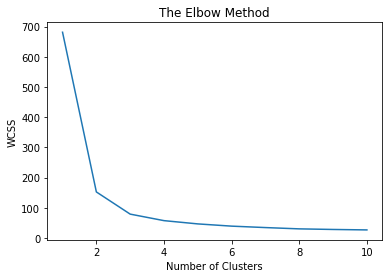

In [4]:
#Using the elbow method
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [5]:
#Training the model.
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

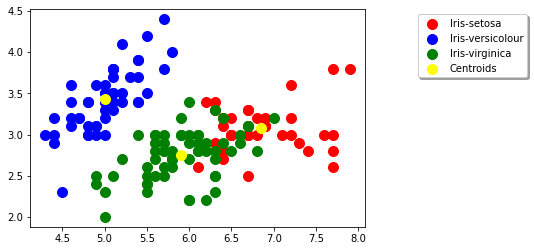

In [6]:
#Plotting the Scatter-PLot to distinguish the clusters.
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=100, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=100, c='blue', label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=100, c='green', label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='yellow', label='Centroids')

plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.0), shadow=True)
plt.show()